#Data Wrangling

In [2]:
#mengimport library yang akan digunakan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Memuat dataset
df = pd.read_csv('Restaurant_revenue.csv')

In [4]:
# Tampilkan beberapa baris pertama dari dataset
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


In [5]:
#menampilkan informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


In [6]:
#untuk melihat statistik deskriptif dari dataset
df.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


In [7]:
#melihat nilai null
df.isnull().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

In [8]:
# Mengecek apakah ada duplikat
duplikat = df.duplicated()
print(duplikat.sum())  # Jumlah baris duplikat

0


#Eksplorasi Data

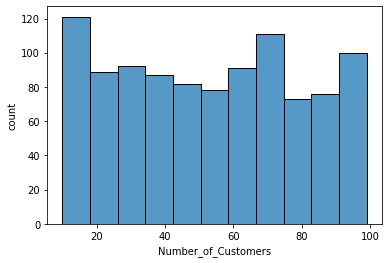

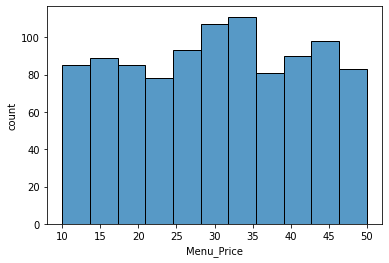

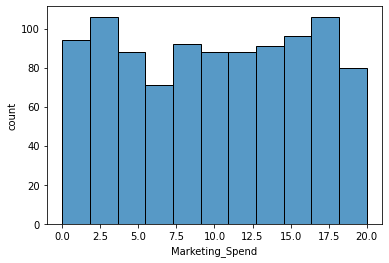

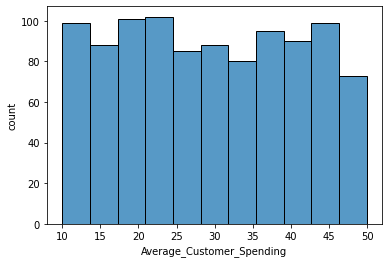

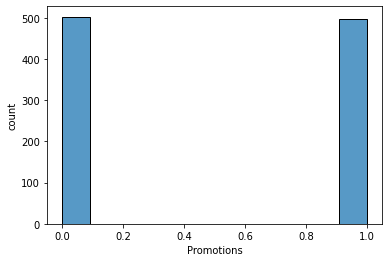

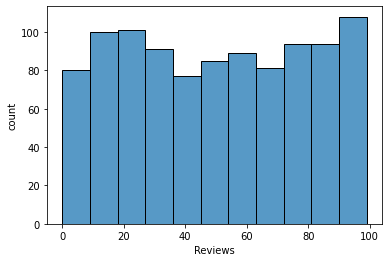

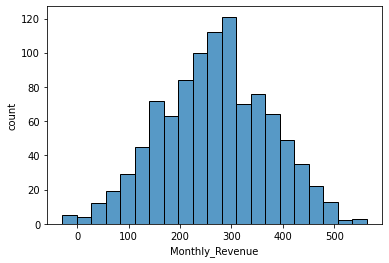

In [9]:
# membuat histogram dari setiap kolom numerik
for col in df.columns:
    if df[col].dtype != 'object':
        sns.histplot(df[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

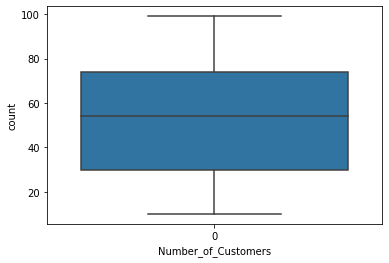

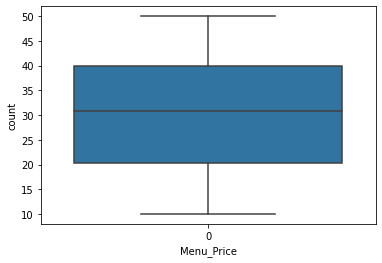

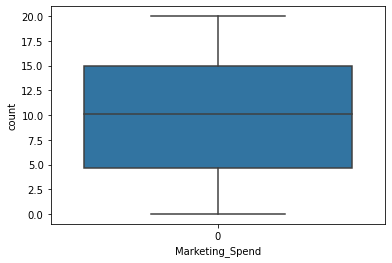

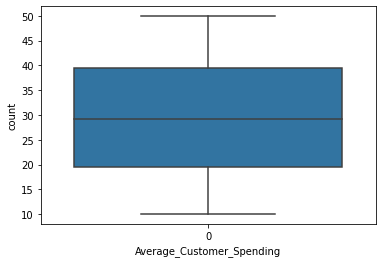

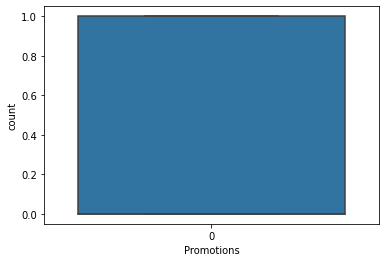

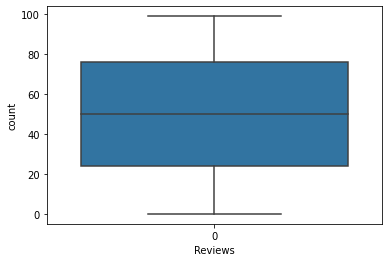

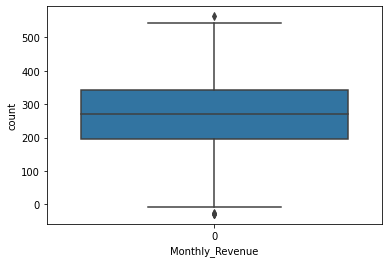

In [10]:
#mengecek outliers
for col in df.columns:
    if df[col].dtype != 'object':
        sns.boxplot(df[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

In [11]:
# mengonversi variabel kategorikal menjadi numerik sehingga dapat digunakan oleh algoritma machine learning
# Inisialisasi Label Encoder
label_encoder = LabelEncoder()

In [12]:
df['Cuisine_Type'] = label_encoder.fit_transform(df['Cuisine_Type'])

In [13]:
X = df[['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Cuisine_Type', 'Average_Customer_Spending', 'Promotions', 'Reviews']]
y = df['Monthly_Revenue']

In [14]:
X

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews
0,61,43.117635,12.663793,2,36.236133,0,45
1,24,40.020077,4.577892,1,17.952562,0,36
2,81,41.981485,4.652911,2,22.600420,1,91
3,70,43.005307,4.416053,1,18.984098,1,59
4,30,17.456199,3.475052,1,12.766143,1,30
...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,2,19.033585,1,40
996,31,20.615496,5.822885,3,17.040990,0,57
997,69,17.110656,4.141898,2,44.649315,0,55
998,73,37.664722,3.046556,2,27.767358,0,23


In [15]:
y

0      350.912040
1      221.319091
2      326.529763
3      348.190573
4      185.009121
          ...    
995    249.312034
996    110.228767
997    312.212552
998    272.482204
999    379.973072
Name: Monthly_Revenue, Length: 1000, dtype: float64

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

#Evaluasi Model

Linear Regression :

In [17]:
# Membagi data menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
# Membuat model Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [19]:
# Evaluasi model Linear Regression
y_pred_lr = model_lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [20]:
# Menampilkan hasil evaluasi
print("Linear Regression Model Evaluation:")
print(f'Mean Absolute Error: {mae_lr}')
print(f'Mean Squared Error: {mse_lr}')
print(f'R-squared: {r2_lr}')

Linear Regression Model Evaluation:
Mean Absolute Error: 47.15440207896496
Mean Squared Error: 3559.480159604582
R-squared: 0.6741504018552007


Random Forest :

In [22]:
# Membuat model Random Forest
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [23]:
# Evaluasi model Random Forest
y_pred_rf = model_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [24]:
# Menampilkan hasil evaluasi
print("\nRandom Forest Model Evaluation:")
print(f'Mean Absolute Error: {mae_rf}')
print(f'Mean Squared Error: {mse_rf}')
print(f'R-squared: {r2_rf}')


Random Forest Model Evaluation:
Mean Absolute Error: 52.74244452760502
Mean Squared Error: 4148.642711368883
R-squared: 0.620216014774451
